### Relatório Dataming - Avito Demand Prediction Challenge - Parte 3 - Predições com Naive Bayes

#### Time:
- Filipe Koop
- Lucas Pérez
- Raphael Coelho

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import preprocessing, utils
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dir = '/Users/lucasperez/Downloads/'
data = pd.read_csv(dir + 'train.csv')

Nesta parte, irá ser demonstrada o uso de Naive Bayes. Primeiramente, analisamos as médias dos grupos que vamos considerar, que no caso estamos nos referindo à 'parent_category_name' e 'user_type'. Vemos então que as maiores médias destinam-se ao usuário do tipo 'private', com a penultima categoria sendo a de maior média dentre todos os tipos de usuários.

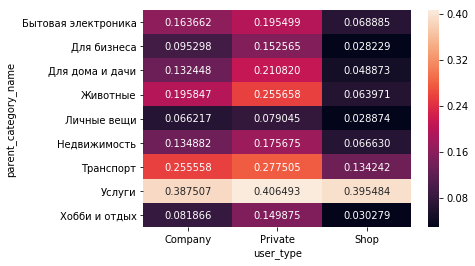

In [3]:
mean_probability = data.groupby(['parent_category_name', 'user_type'])['deal_probability'].mean().unstack()
sns.heatmap(mean_probability, annot=True, fmt="f")

Aplicamos então o modelo MultinomialNB cujo qual estima a probabilidade condicional de uma palavra, termo em particular dado uma classe e a frequência desse termo nos documentos pertences aquela classe. 

Como já foi mencionado, iremos trabalhar aqui apenas com 'parent_category_name' e'user_type'. Logo, foi montado um dataframe apenas para a aplicação do modelo utilizando a base de treino, e em seguida aplicou-se o algoritmo. Vemos então que o número total de elementos usados foi de de 150.434 com os provaveis resultado de 1 e 0 para possivel compra ou não, respectivamente e uma taxa de 72% do modelo conseguir classificar entre estes dois resultados.

In [4]:
#exibindo os dados do dataset
display(data.head())

np.random.seed(0)


#montando o dataframe que vamos usar
x_df = data[['parent_category_name','user_type']]
Y = []

#montando o Y
#para cada elemento do dataset, testamos se um numero randomico é menor do que a media da probabilidade de compra do grupo
#aqui seria bom testar 10 numeros randomicos e tirar uma media
for index, row in data.iterrows():
    random_number = np.random.randint(30, size=1)
    if random_number <= (mean_probability[row.user_type][row.parent_category_name] * 100):
        Y.append(1)
    else:
        Y.append(0)

# print(Y)


# transformando as variaveis cartegoricas em numeros para que seja possivel rodar o naive_bayes
x_dummies_df = pd.get_dummies(x_df)

X = x_dummies_df.values

# separando um percentual para treino e para testes 
train_size = int(0.9 * len(Y))
test_size = int(len(Y) - train_size)

X_train = X[:train_size]
Y_train = Y[:train_size]

X_test =  X[-test_size:]
Y_test =  Y[-test_size:]

# fit and predict
modelo = MultinomialNB()
modelo.fit(X_train, Y_train)

resultado = modelo.predict(X_test)

# modelo.predict_proba(X_test)[0:10]

# calculando e imprimindo a taxa de acerto do algoritmo
diferencas = resultado - Y_test
acertos = [d for d in diferencas if d == 0]
total_de_acertos = len(acertos)
total_de_elementos = len(X_test)
taxa_de_acerto = 100 * total_de_acertos / total_de_elementos

print("A taxa de acerto é de : " + str(taxa_de_acerto))
print("O número total de elementos é de: " + str(total_de_elementos))
print(np.unique(resultado))


,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


A taxa de acerto é de : 72.10511962645417
O número total de elementos é de: 150343
[0 1]


Por conseguinte, validou-se o modelo treinado com novos dados vindos da base de teste, onde novamente montou-se o dataframe com as variavéis alvos e por fim aplicou-se o modelo.

Como saída, temos cada resultado único que marca com o número '1' a qual categoria cada resultado pertence, e mais ao final da tabela, podemos ver a qual usuário o modelo classifcou a possivel compra, e percebe-se que todos esão voltados aos usuários do tipo 'private'. Como vimos no primeiro mapa de calor desta parte, este tipo de usuário é o qual tem mais probabilidade de compra, e também é o tipo de usuário mais comum na base. Ratificando essas informações, o modelo proposto designou todos os resultados a este tipo de usuário.

Com isso cria-se um arquivo csv onde para cada elemento do dataframe de submissao, se ele foi marcado como provavel compra, 
pegamos a probabilidade de compra do grupo do item e colocamos no dataframe,caso ele tenha sido marcado como 0, colocamos uma probabilidade baixa de 0.12

In [5]:
#Validando o modelo treinado com dados novos que vem da base de testes
data = pd.read_csv(dir + 'test_avito.csv')

# montando o dataframe com os dados de teste para serem validados
x_df = data[['parent_category_name', 'user_type']]
x_dummies_df = pd.get_dummies(x_df)
display(x_dummies_df.head())
X = x_dummies_df.values

#predizendo os valores dos dados de teste
resultado = modelo.predict(X)

#verificando o resultado do predict
print(np.unique(resultado))

# montando o dataframe para submissão
submission_df = pd.DataFrame()
submission_df['item_id'] = data['item_id']
submission_df['user_type'] = data['user_type']
submission_df['parent_category_name'] = data['parent_category_name']
submission_df['deal_probability'] = resultado

probabilities = []

# para cada elemento do dataframe de submissao, se ele foi marcado como provavel compra, 
# pegamos a probabilidade de compra do grupo do item e colocamos no dataframe
# caso ele tenha sido marcado como 0, colocamos uma probabilidade baixa de 0.12
for index, row in submission_df.iterrows():
    if (row.deal_probability == 1):
        probabilities.append(mean_probability[row.user_type][row.parent_category_name])
    else:
        probabilities.append(0.12)

submission_df['deal_probability'] = probabilities

#removendo colunas auxiliares
submission_df.drop('user_type', axis=1, inplace=True)
submission_df.drop('parent_category_name', axis=1, inplace=True)

#gerando o csv
submission_df.to_csv('naive_bayes_user_type_and_parent_category_name_mean_and_0_12_random_int_30.csv', index=False)


,parent_category_name_Бытовая электроника,parent_category_name_Для бизнеса,parent_category_name_Для дома и дачи,parent_category_name_Животные,parent_category_name_Личные вещи,parent_category_name_Недвижимость,parent_category_name_Транспорт,parent_category_name_Услуги,parent_category_name_Хобби и отдых,user_type_Company,user_type_Private,user_type_Shop
0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,0


[0 1]
